In [15]:
# import packages
from gwpy.segments import DataQualityDict
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from gwpy.table import Table
from gwpy.plot import Plot
import IPython
import librosa

In [16]:
# define parameters
channel_name = 'L1:PEM-EY_MIC_VEA_PLUSY_DQ'
#channel_name = 'L1:PEM-CS_ACC_HAM6_OMC_Z_DQ'
#duration = 600
duration = 10

#gps  = 1129945218
gps = 1248468556
- 10
gpse = gps + duration
gpss = gps 

In [17]:
# request data
data = TimeSeries.get(channel_name, gpss, gpse, verbose=False)
fr = 1/data.dt.value

In [18]:
# correct units and bandpass
microphone = 1.9e-4 * data
bp = microphone.bandpass(35, 39)

In [19]:
r = bp.rms(stride=1)

y = microphone
sr=16384
librosa.output.write_wav('audio_file.wav', y,sr)

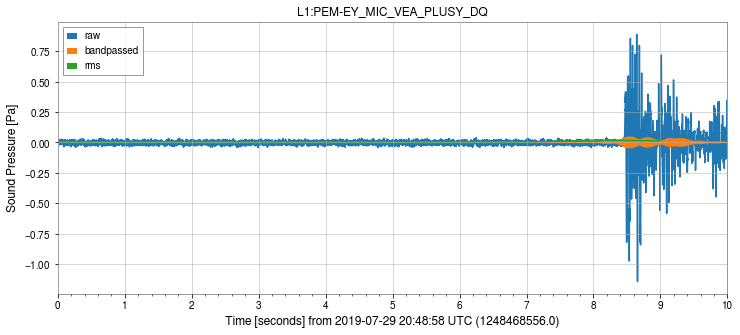

In [20]:
# plot
plot = Plot(microphone, bp, r,  figsize=(12,5), sharex=True)
ax0 = plot.gca()
ax0.set_ylabel('Sound Pressure [Pa]')
ax0.set_title(channel_name)
ax0.legend(['raw', 'bandpassed','rms'])
plot.show()


plot.savefig("L1:PEM-CS_HAM6_OMC_Z_DQ 1263044418")

In [21]:
# play audio
IPython.display.Audio(microphone, rate=fr) 


import numpy as np
from sklearn.linear_model import LinearRegression